## Name : Devashish
## Kaggle competition : https://www.kaggle.com/competitions/rossmann-store-sales/overview

In [1]:
#Mount google drivw
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#To load dataset from kaggle, following steps are necessary
!pip install -q kaggle

In [3]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle 
!echo '{"username":"devashishmahajan","key":"e277179a25fbf5421887aeb6e82bc617"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c rossmann-store-sales

rossmann-store-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#Unzip the downloaded dataset
!unzip rossmann-store-sales.zip

Archive:  rossmann-store-sales.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace store.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: store.csv               
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [5]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [6]:
#Read training dataset
sales_train_df = pd.read_csv('/content/train.csv');

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



In [7]:
print(sales_train_df.shape)
sales_train_df.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
sales_train_df.info() #check for object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [10]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
# supplemental information about the stores
store_info_df = pd.read_csv('/content/store.csv')

In [12]:
print(store_info_df.shape)
store_info_df.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
store_info_df.info() #check for object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [14]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


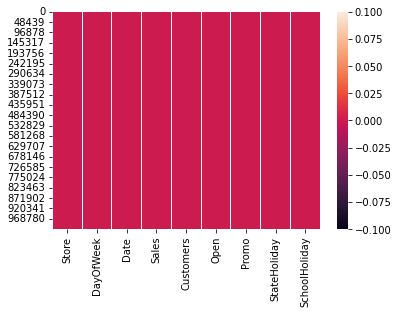

In [15]:
#EDA
#Sales data
sns.heatmap(sales_train_df.isnull());

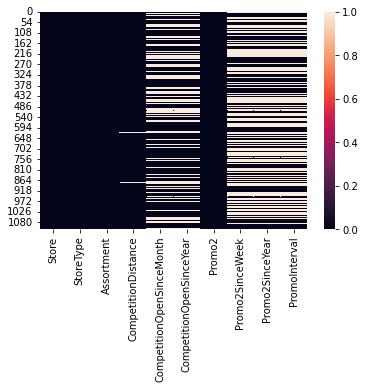

In [16]:
#store data
sns.heatmap(store_info_df.isnull());

In [17]:
sales_train_df.isnull().sum() #No null values

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

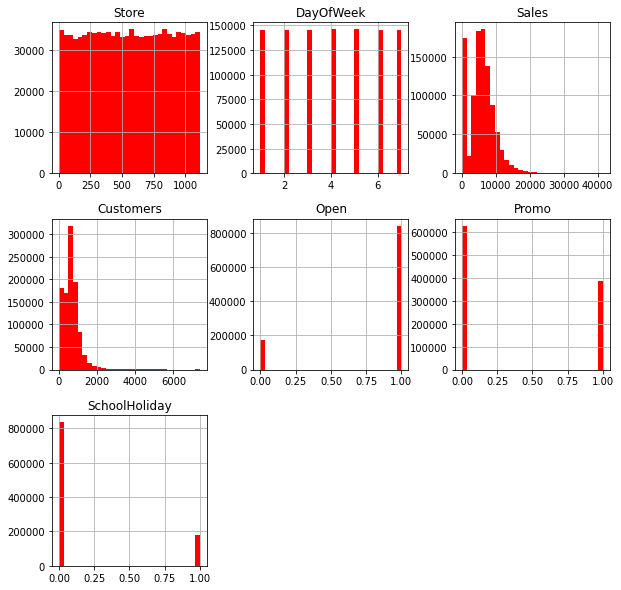

In [19]:
#Sales data
sales_train_df.hist(bins = 30, figsize = (10, 10), color = 'r');

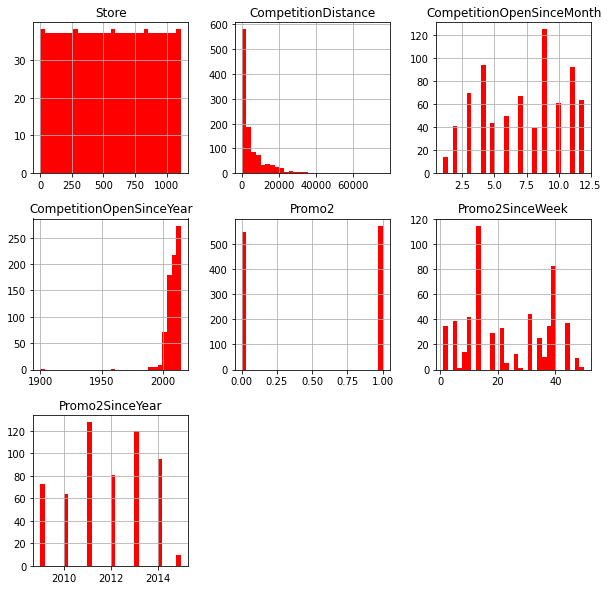

In [20]:
#store data
store_info_df.hist(bins = 30, figsize = (10, 10), color = 'r');

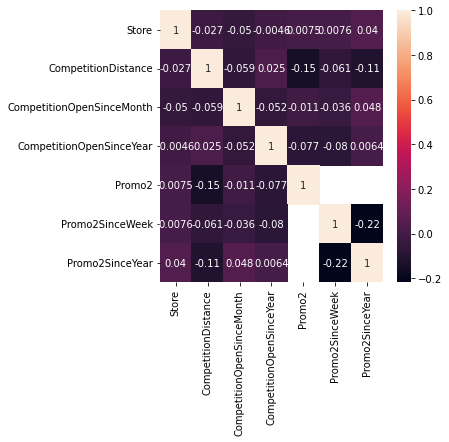

In [21]:
#store data
correlations = store_info_df.corr()
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, annot = True);

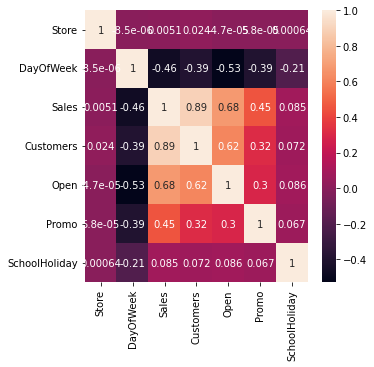

In [22]:
#Sales data
correlations = sales_train_df.corr()
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, annot = True);

 ## b.	  Apply at least 4 models and report their leader board scores.

In [23]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import log_loss 

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [24]:
#Read training dataset
train=pd.read_csv("/content/train.csv",parse_dates=['Date'])

#Read testing dataset
test=pd.read_csv("/content/test.csv",parse_dates=['Date'],index_col='Id')

# supplemental information about the stores
store=pd.read_csv("/content/store.csv")

In [25]:
test1=pd.read_csv("/content/test.csv",parse_dates=['Date'])
test1=test1.iloc[:,0]
test1

0            1
1            2
2            3
3            4
4            5
         ...  
41083    41084
41084    41085
41085    41086
41086    41087
41087    41088
Name: Id, Length: 41088, dtype: int64

In [26]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [27]:
train.head(),test.head()

(   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5 2015-07-31   5263        555     1      1            0   
 1      2          5 2015-07-31   6064        625     1      1            0   
 2      3          5 2015-07-31   8314        821     1      1            0   
 3      4          5 2015-07-31  13995       1498     1      1            0   
 4      5          5 2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday  
 0              1  
 1              1  
 2              1  
 3              1  
 4              1  ,
     Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday
 Id                                                                      
 1       1          4 2015-09-17   1.0      1            0              0
 2       3          4 2015-09-17   1.0      1            0              0
 3       7          4 2015-09-17   1.0      1            0              0
 4       8          4 2015-09-17 

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [29]:
train_dum=pd.get_dummies(train,drop_first=True)
test_dum =pd.get_dummies(test,drop_first=True)

train.shape,train_dum.shape,test.shape,test_dum.shape

((1017209, 9), (1017209, 12), (41088, 7), (41088, 7))

In [30]:
total_df=pd.concat([train_dum,test_dum],axis=0,ignore_index=True)

total_df.shape

total_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c'],
      dtype='object')

In [31]:
total_df['year']=total_df['Date'].dt.year
total_df['month']=total_df['Date'].dt.month
total_df['day']=total_df['Date'].dt.day
total_df['hour']=total_df['Date'].dt.hour
total_df['weekday']=total_df['Date'].dt.weekday

total_df.drop('Customers',axis=1,inplace=True)

In [32]:
train_df=total_df[:train_dum.shape[0]]
test_df=total_df[train_dum.shape[0]:]
print(train_df.shape,test_df.shape)

train_df.columns,test_df.columns

(1017209, 16) (41088, 16)


(Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Open', 'Promo', 'SchoolHoliday',
        'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
        'year', 'month', 'day', 'hour', 'weekday'],
       dtype='object'),
 Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Open', 'Promo', 'SchoolHoliday',
        'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
        'year', 'month', 'day', 'hour', 'weekday'],
       dtype='object'))

In [33]:
train_df.drop('Date',inplace=True,axis=1)
test_df.drop('Date',inplace=True,axis=1)

In [34]:
X=train_df.drop('Sales',axis=1,inplace=False)
y=train_df['Sales']
y

0           5263.0
1           6064.0
2           8314.0
3          13995.0
4           4822.0
            ...   
1017204        0.0
1017205        0.0
1017206        0.0
1017207        0.0
1017208        0.0
Name: Sales, Length: 1017209, dtype: float64

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Store           1017209 non-null  int64  
 1   DayOfWeek       1017209 non-null  int64  
 2   Open            1017209 non-null  float64
 3   Promo           1017209 non-null  int64  
 4   SchoolHoliday   1017209 non-null  int64  
 5   StateHoliday_0  1017209 non-null  float64
 6   StateHoliday_a  1017209 non-null  uint8  
 7   StateHoliday_b  1017209 non-null  float64
 8   StateHoliday_c  1017209 non-null  float64
 9   year            1017209 non-null  int64  
 10  month           1017209 non-null  int64  
 11  day             1017209 non-null  int64  
 12  hour            1017209 non-null  int64  
 13  weekday         1017209 non-null  int64  
dtypes: float64(4), int64(9), uint8(1)
memory usage: 101.9 MB


In [36]:
X1_test=test_df.drop('Sales',axis=1,inplace=False)
X1_test.info()
X1_test=X1_test.fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 1017209 to 1058296
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store           41088 non-null  int64  
 1   DayOfWeek       41088 non-null  int64  
 2   Open            41077 non-null  float64
 3   Promo           41088 non-null  int64  
 4   SchoolHoliday   41088 non-null  int64  
 5   StateHoliday_0  0 non-null      float64
 6   StateHoliday_a  41088 non-null  uint8  
 7   StateHoliday_b  0 non-null      float64
 8   StateHoliday_c  0 non-null      float64
 9   year            41088 non-null  int64  
 10  month           41088 non-null  int64  
 11  day             41088 non-null  int64  
 12  hour            41088 non-null  int64  
 13  weekday         41088 non-null  int64  
dtypes: float64(4), int64(9), uint8(1)
memory usage: 4.1 MB


In [37]:
#XGBRegressor
clf_xgb=XGBRegressor(random_state=2022)
clf_xgb.fit(X,y)
ypred=clf_xgb.predict(X1_test)
ypred

y_pred= clf_xgb.predict(X1_test)
ypred=pd.Series(y_pred,index=test1.index,name='Sales')
ypred.to_frame()

submit = pd.concat([test1, ypred], axis = 1)
submit.to_csv("submit_XGBRegressor.csv", index=False)

! kaggle competitions submit -c "rossmann-store-sales" -f "submit_XGBRegressor.csv" -m "submit_XGBRegressor.csv"
! kaggle competitions submissions "rossmann-store-sales"

[08:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
100% 612k/612k [00:02<00:00, 247kB/s]
Successfully submitted to Rossmann Store SalesfileName                               date                 description                            status    publicScore  privateScore  
-------------------------------------  -------------------  -------------------------------------  --------  -----------  ------------  
submit_XGBRegressor.csv                2022-06-11 08:01:32  submit_XGBRegressor.csv                complete  0.41782      0.43161       
submit_DecisionTreeRegressor.csv       2022-06-11 07:55:26  submit_DecisionTreeRegressor.csv       complete  0.27967      0.41444       
submit_XGBRegressor.csv                2022-06-11 07:54:08  submit_XGBRegressor.csv                complete  0.41782      0.43161       
submit_LinearRegression.csv            2022-06-11 07:52:55  submit_LinearRegression.csv            compl

In [38]:
lr=LinearRegression()
dt=DecisionTreeRegressor(random_state=2022)
lda=LinearDiscriminantAnalysis()

In [39]:
# Linear Regression
lr.fit(X,y)

y_pred= lr.predict(X1_test)
ypred=pd.Series(y_pred,index=test1.index,name='Sales')
ypred.to_frame()

submit = pd.concat([test1, ypred], axis = 1)
submit.to_csv("submit.csv", index=False)

submit = pd.concat([test1, ypred], axis = 1)
submit.to_csv("submit_LinearRegression.csv", index=False)

! kaggle competitions submit -c "rossmann-store-sales" -f "submit_LinearRegression.csv" -m "submit_LinearRegression.csv"
! kaggle competitions submissions "rossmann-store-sales"

100% 952k/952k [00:04<00:00, 207kB/s]
Successfully submitted to Rossmann Store SalesfileName                               date                 description                            status    publicScore  privateScore  
-------------------------------------  -------------------  -------------------------------------  --------  -----------  ------------  
submit_LinearRegression.csv            2022-06-11 08:01:49  submit_LinearRegression.csv            complete  0.46175      0.48074       
submit_XGBRegressor.csv                2022-06-11 08:01:32  submit_XGBRegressor.csv                complete  0.41782      0.43161       
submit_DecisionTreeRegressor.csv       2022-06-11 07:55:26  submit_DecisionTreeRegressor.csv       complete  0.27967      0.41444       
submit_XGBRegressor.csv                2022-06-11 07:54:08  submit_XGBRegressor.csv                complete  0.41782      0.43161       
submit_LinearRegression.csv            2022-06-11 07:52:55  submit_LinearRegression.csv       

In [40]:
#DecisionTreeRegressor
dt.fit(X,y)

y_pred= dt.predict(X1_test)
ypred=pd.Series(y_pred,index=test1.index,name='Sales')
ypred.to_frame()

submit = pd.concat([test1, ypred], axis = 1)
submit.to_csv("submit_DecisionTreeRegressor.csv", index=False)

! kaggle competitions submit -c "rossmann-store-sales" -f "submit_DecisionTreeRegressor.csv" -m "submit_DecisionTreeRegressor.csv"
! kaggle competitions submissions "rossmann-store-sales"

100% 498k/498k [00:03<00:00, 130kB/s]
Successfully submitted to Rossmann Store SalesfileName                               date                 description                            status    publicScore  privateScore  
-------------------------------------  -------------------  -------------------------------------  --------  -----------  ------------  
submit_DecisionTreeRegressor.csv       2022-06-11 08:02:05  submit_DecisionTreeRegressor.csv       pending                              
submit_LinearRegression.csv            2022-06-11 08:01:49  submit_LinearRegression.csv            complete  0.46175      0.48074       
submit_XGBRegressor.csv                2022-06-11 08:01:32  submit_XGBRegressor.csv                complete  0.41782      0.43161       
submit_DecisionTreeRegressor.csv       2022-06-11 07:55:26  submit_DecisionTreeRegressor.csv       complete  0.27967      0.41444       
submit_XGBRegressor.csv                2022-06-11 07:54:08  submit_XGBRegressor.csv           

In [ ]:
#LinearDiscriminantAnalysis
lda.fit(X,y)

y_pred=lda.predict(X1_test)
ypred=pd.Series(y_pred,index=test1.index,name='Sales')
ypred.to_frame()

submit = pd.concat([test1, ypred], axis = 1)
submit.to_csv("submit_LinearDiscriminantAnalysis.csv", index=False)

! kaggle competitions submit -c "rossmann-store-sales" -f "submit_LinearDiscriminantAnalysis.csv" -m "submit_LinearDiscriminantAnalysis.csvv"
! kaggle competitions submissions "rossmann-store-sales"

In [41]:
#catboost
!pip install catboost
cat=CatBoostRegressor(random_state=2022)
cat.fit(X,y)

y_pred=cat.predict(X1_test)
ypred=pd.Series(y_pred,index=test1.index,name='Sales')
ypred.to_frame()

submit = pd.concat([test1, ypred], axis = 1)
submit.to_csv("submit_catboost.csv", index=False)

! kaggle competitions submit -c "rossmann-store-sales" -f "submit_catboost.csv" -m "submit_catboost.csv"
! kaggle competitions submissions "rossmann-store-sales"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Learning rate set to 0.122279
0:	learn: 3588.9795513	total: 171ms	remaining: 2m 50s
1:	learn: 3373.9497891	total: 271ms	remaining: 2m 15s
2:	learn: 3198.6642406	total: 382ms	remaining: 2m 6s
3:	learn: 3055.3811793	total: 482ms	remaining: 2m
4:	learn: 2940.5922190	total: 577ms	remaining: 1m 54s
5:	learn: 2848.4763704	total: 680ms	remaining: 1m 52s
6:	learn: 2775.3950198	total: 798ms	remaining: 1m 53s
7:	learn: 2717.0567887	total: 899ms	remaining: 1m 51s
8:	learn: 2670.6125964	total: 1s	remaining: 1m 50s
9:	learn: 2631.7231103	total: 1.12s	remaining: 1m 50s
10:	learn: 2601.6990603	total: 1.22s	remaining: 1m 49s
11:	learn: 2578.4543728	total: 1.32s	remaining: 1m 48s
12:	learn: 2560.0498234	total: 1.42s	remaining: 1m 47s
13:	learn: 2545.4657636	total: 1.53s	remaining: 1m 47s
14:	learn: 2533.9289677	total: 1.63s	remaining: 1m 46s
15:	learn: 2524.6108463	total: 1.72s	remaining: 1m 45s
16:	learn

In [42]:
! kaggle competitions submissions "rossmann-store-sales"

fileName                               date                 description                            status    publicScore  privateScore  
-------------------------------------  -------------------  -------------------------------------  --------  -----------  ------------  
submit_catboost.csv                    2022-06-11 08:04:11  submit_catboost.csv                    complete  0.42165      0.42064       
submit_DecisionTreeRegressor.csv       2022-06-11 08:02:05  submit_DecisionTreeRegressor.csv       complete  0.27967      0.41444       
submit_LinearRegression.csv            2022-06-11 08:01:49  submit_LinearRegression.csv            complete  0.46175      0.48074       
submit_XGBRegressor.csv                2022-06-11 08:01:32  submit_XGBRegressor.csv                complete  0.41782      0.43161       
submit_DecisionTreeRegressor.csv       2022-06-11 07:55:26  submit_DecisionTreeRegressor.csv       complete  0.27967      0.41444       
submit_XGBRegressor.csv                20